# Get dummies

In [1]:
import pandas as pd
import numpy as np

In [5]:
# bring in data
path = '/Users/reneehall/Documents/Learning/lighthouse_labs/coursework-lighthouse-labs/Mid-term project/colab_data/'
fl_df = pd.read_csv(path+'cleaned_balanced_sample.csv')

In [6]:
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance'],
      dtype='object')

In [7]:
#Add Date Featues to table
fl_df['year'] = pd.to_datetime(fl_df['fl_date']).dt.year
fl_df['quarter'] = pd.to_datetime(fl_df['fl_date']).dt.quarter
fl_df['month'] = pd.to_datetime(fl_df['fl_date']).dt.month
fl_df['day_of_month'] = pd.to_datetime(fl_df['fl_date']).dt.day
fl_df['day_of_week'] = pd.to_datetime(fl_df['fl_date']).dt.dayofweek
#Add time features to table
fl_df['crs_dep_hour'] = pd.to_datetime(fl_df['crs_dep_time'], format='%H%M', errors ='coerce').dt.hour
fl_df['crs_arr_hour'] = pd.to_datetime(fl_df['crs_dep_time'], format='%H%M', errors ='coerce').dt.hour

In [14]:
cols = ['op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest',
        'crs_elapsed_time', 'distance','month','day_of_month',
        'day_of_week','crs_arr_hour']
fl_df['arr_delay_flag'] = fl_df['arr_delay'].map(lambda x: 1 if x > 0 else 0)

X = fl_df[cols]
y = fl_df['arr_delay_flag']

<AxesSubplot:>

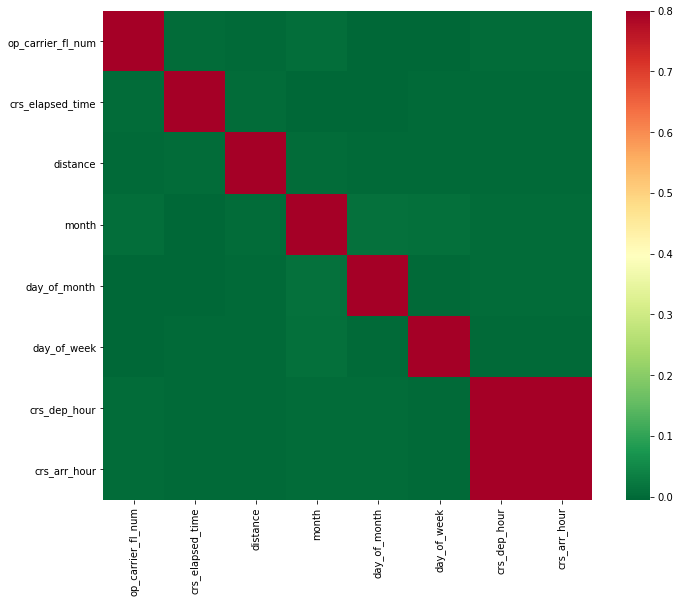

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = fl_df[cols].corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdYlGn_r')

In [16]:
X = pd.get_dummies(X, columns=['op_unique_carrier','origin','dest','month','crs_arr_hour','day_of_week','tail_num', 'op_carrier_fl_num'], drop_first=True)

In [17]:
X.to_csv(path+'dummy_samples.csv')

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xsc = scaler.fit_transform(X)

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA()
components = pca.fit_transform(Xsc)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
n_components = 14

pca = PCA(n_components=n_components)
X_transformed = pca.fit_transform(Xsc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, train_size=0.7, test_size=0.3, random_state=101)